# 이미지 데이터 셋을 이용한 CNN Modeling
## Animals Dataset Categorical Classification
* Train_Data : 5000
* Valid_Data : 3000
* Test_Data : 3000

In [1]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

# I. wget From Github

> ## 1) 'animals_part.zip' 파일 다운로드

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z{ip,01,02}

--2023-04-04 06:39:18--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88551715 (84M) [application/zip]
Saving to: ‘animals_part.zip’

animals_part.zip    100%[===================>]  84.45M   193MB/s    in 0.4s    

2023-04-04 06:39:19 (193 MB/s) - ‘animals_part.zip’ saved [88551715/88551715]

--2023-04-04 06:39:19--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z01
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘animals_part.z01’

animals_part.z01    100%[===================>]  90.00M   149MB/s    in 0.6s    

2023-04-04 06:39:20 (149 

* 다운로드 결과 확인

In [4]:
!ls -l

total 270804
-rw-r--r-- 1 root root 94371840 Apr  4 06:39 animals_part.z01
-rw-r--r-- 1 root root 94371840 Apr  4 06:39 animals_part.z02
-rw-r--r-- 1 root root 88551715 Apr  4 06:39 animals_part.zip
drwxr-xr-x 1 root root     4096 Mar 31 13:36 sample_data


> ## 2) 분할된 파일 합치기

In [5]:
!zip -Fq animals_part.zip --out animals.zip

* 'animals.zip' 생성 확인

In [6]:
!ls -l

total 541604
-rw-r--r-- 1 root root  94371840 Apr  4 06:39 animals_part.z01
-rw-r--r-- 1 root root  94371840 Apr  4 06:39 animals_part.z02
-rw-r--r-- 1 root root  88551715 Apr  4 06:39 animals_part.zip
-rw-r--r-- 1 root root 277295391 Apr  4 06:39 animals.zip
drwxr-xr-x 1 root root      4096 Mar 31 13:36 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'animals.zip'

In [7]:
!unzip -q /content/animals.zip

* 학습 데이터 확인

In [8]:
!ls -l animals/

total 12
drwxr-xr-x 12 root root 4096 Oct 25 13:50 test
drwxr-xr-x 12 root root 4096 Oct 25 13:50 train
drwxr-xr-x 12 root root 4096 Oct 25 13:50 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [9]:
train_dir = 'animals/train'
valid_dir = 'animals/validation'
test_dir  = 'animals/test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255 )
valid_datagen = ImageDataGenerator(rescale = 1. / 255 )

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 50,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 50,
                  class_mode = 'categorical'
)

Found 5000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


> ## 4) Test train_generator

In [12]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 : ',data_batch.shape)
    print('배치 레이블 크기 : ',labels_batch.shape)
    break

배치 데이터 크기 :  (50, 150, 150, 3)
배치 레이블 크기 :  (50, 10)


In [13]:
labels_batch

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 

# III. CNN Keras Modeling

> ## 1) Model Define

In [23]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256,(3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 256)     

> ## 2) Model Compile

In [25]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

In [29]:
%%time

Hist_Animal = model.fit(train_generator,
                        steps_per_epoch = 100,
                        epochs = 60,
                        validation_data = valid_generator,
                        validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 22s 216ms/step - loss: 2.0675 - accuracy: 0.2398 - val_loss: 2.0227 - val_accuracy: 0.2380
Epoch 2/60
100/100 [==============================] - 38s 385ms/step - loss: 1.9170 - accuracy: 0.2932 - val_loss: 2.0487 - val_accuracy: 0.2576
Epoch 3/60
100/100 [==============================] - 33s 330ms/step - loss: 1.7670 - accuracy: 0.3508 - val_loss: 1.8856 - val_accuracy: 0.3416
Epoch 4/60
100/100 [==============================] - 32s 316ms/step - loss: 1.5089 - accuracy: 0.4544 - val_loss: 1.6774 - val_accuracy: 0.4020
Epoch 5/60
100/100 [==============================] - 27s 272ms/step - loss: 1.2977 - accuracy: 0.5376 - val_loss: 1.5812 - val_accuracy: 0.4636
Epoch 6/60
100/100 [==============================] - 27s 270ms/step - loss: 1.0958 - accuracy: 0.6100 - val_loss: 1.5305 - val_accuracy: 0.4864
Epoch 7/60
100/100 [==============================] - 23s 226ms/step - loss: 0.9119 - accuracy: 0.6730 - val_loss: 1.7175 - val_ac

> ## 4) 학습 결과 시각화

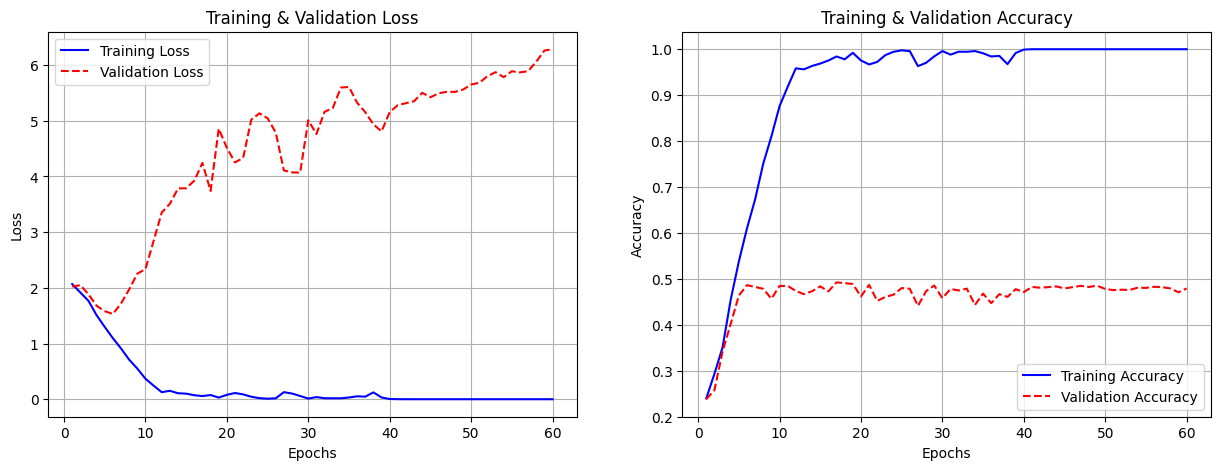

In [30]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_Animal.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_Animal.history['loss'], 'b-')
plt.plot(epochs, Hist_Animal.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_Animal.history['accuracy'], 'b-')
plt.plot(epochs, Hist_Animal.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

In [34]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 50,
                 class_mode = 'categorical')

Found 3000 images belonging to 10 classes.


In [35]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50, 
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 6.11661
Accuracy = 0.47920


# 
# 
# 
# The End
# 
# 
# 